In [4]:
from arcgis import GIS
gis = GIS("https://arcgis.com", "renemorenow", input())
gis.url

Umbita01


'https://renemorenow.maps.arcgis.com'

<Item title:"Historical Wildfires in the Four Corners States" type:Feature Layer Collection owner:TempAuthor>
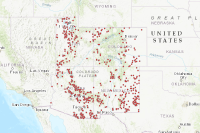

In [5]:
search_result = gis.content.search('title:Historical Wildfires in the Four Corners States', 
                                   item_type = 'Feature Layer', outside_org=True)
fire_points = search_result[0]
fire_points

# Use Smart Mapping

In [7]:
map1 = gis.map()
map1.zoom = 5
map1.center = [36.998972,-109.045167]
map1.basemap = 'hybrid'
map1.legend = True
map1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [8]:
# Add the feature layer to map1, using Smart Mapping to create a 
# graduated color map based on the Precip_Depart attribute field
map1.add_layer(fire_points, {"renderer":"ClassedColorRenderer", "field_name":"Precip_Depart"})
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), legend=True, ready=True)

# Use autocasting

In [9]:
map2 = gis.map()
map2.zoom = 5
map2.center = [36.998972,-109.045167]
map2.basemap = 'gray'
map2.legend = True
map2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [10]:
# Set up a custom renderer

renderer = {"renderer": "autocast", #Tell python to use JS autocasting
            "type": "classBreaks",  
            "field":"Acres",
            "transparency":25,
            "minValue":-9007199254740991}

renderer["visualVariables"] = [{   "type": "sizeInfo",
                                            "field": "Acres",
                                            "valueUnit": "unknown",
                                            "minSize": 3,
                                            "maxSize": 30,
                                            "minDataValue": 0,
                                            "maxDataValue": 500000
                                    },
                               {   "type": "colorInfo",
                                           "field": "Precip_Depart",
                                           "stops": [  {   "value": -6,
                                                            "color": [166,97,26,255],
                                                            "label": "< -6"
                                                        },
                                                        {   "value": -3,
                                                            "color": [223,194,125,255],
                                                            "label": "-3"
                                                        },
                                                        {   "value": 0,
                                                            "color": [245,245,245,255],
                                                            "label": "0"
                                                        },
                                                        {   "value": 3,
                                                            "color": [128,205,193,255],
                                                            "label": "3"
                                                        },
                                                        {   "value": 6,
                                                            "color": [1,133,113,255],
                                                            "label": "> 6"
                                                        }],
                                            "legendOptions": {"title": "Departure from average precipitation (inches)"}
                                    }]

renderer["classBreakInfos"] =     [{   "symbol": {
                                                "color": [227,139,79,255],
                                                "size": 2,
                                                "angle": 0,
                                                "xoffset": 0,
                                                "yoffset": 0,
                                                "type": "esriSMS",
                                                "style": "esriSMSCircle",
                                                "outline": {
                                                    "color": [51,51,51,20],
                                                    "width": 0.75,
                                                    "type": "esriSLS",
                                                    "style": "esriSLSSolid"
                                                }
                                            },
                                            "classMaxValue": 9007199254740991
                                        }]

In [11]:
# Add the feature layer to map2, using autocasting to render the data
map2.add_layer(fire_points, { "type": "FeatureLayer", "renderer":renderer, "field_name":"Acres"})
map2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), legend=True, ready=True)